In [13]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

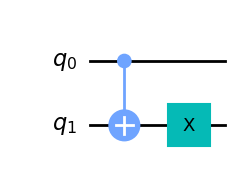

In [8]:
def Deutsch_Function(case: int):
    """
    Let's Generate a Deutsch Function as a `QuantumCircuit`.
    """
    if case not in [1,2,3,4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2,3]:
        f.cx(0, 1)
    if case in [3,4]:
        f.x(1)
    return f
Deutsch_Function(3).draw(output='mpl')

In [9]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in Deutsch's algorithm.
    """
    n = function.num_qubits-1
    qc = QuantumCircuit(n+1, n)

    qc.x(n)
    qc.h(range(n+1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

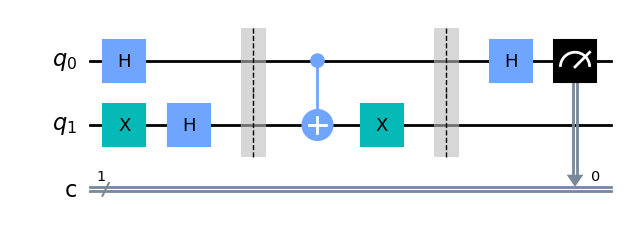

In [12]:
compile_circuit(
    Deutsch_Function(3)
).draw(output="mpl")

In [14]:

def deutsch_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch function is constant or balanced.
    """
    qc = compile_circuit(function)
    
    result = AerSimulator().run(qc,shots=1,memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == '0':
        return "constant"
    return "balanced"

In [17]:
deutsch_algorithm(
    Deutsch_Function(3)
)

'balanced'